<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://raw.githubusercontent.com/Unidata/MetPy/master/src/metpy/plots/_static/unidata_150x150.png" alt="Unidata Logo" style="height: 98px;">
</div>

<h1>Python Basics-Numpy, Matplotlib, and Cartopy</h1>
<h3>AMS Student Conference 2020 Python Workshop</h3>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

<div style="float:right; width:250 px"><img src="http://www.contribute.geeksforgeeks.org/wp-content/uploads/numpy-logo1.jpg" alt="NumPy Logo" style="height: 250px;"></div>


## Overview:

* **Teaching:** 20-25 minutes

### Questions
1. What are arrays?
2. How can arrays be manipulated effectively in Python?
3. How can Matplotlib be used to plot data?
4. How can we make maps in Python?

### Objectives
1. Create an array of ‘data’.
2. Perform basic calculations on this data using python math functions.
3. Slice and index the array
4. Plot some data with Matplotlib
5. Make some maps with Cartopy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- useful linear algebra, Fourier transform, and random number capabilities

The NumPy array object is the common interface for working with typed arrays of data across a wide-variety of scientific Python packages. NumPy also features a C-API, which enables interfacing existing Fortran/C/C++ libraries with Python and NumPy.

## Create an array of 'data'

The NumPy array represents a *contiguous* block of memory, holding entries of a given type (and hence fixed size). The entries are laid out in memory according to the shape, or list of dimension sizes.

In [1]:
# Convention for import to get shortened namespace
import numpy as np

In [2]:
# Create a simple array from a list of integers
a = np.array([1, 2, 3])
a

array([1, 2, 3])

In [3]:
# See how many dimensions the array has
a.ndim

1

In [4]:
# Print out the shape attribute
a.shape

(3,)

In [5]:
# Print out the data type attribute
a.dtype

dtype('int32')

In [6]:
# This time use a nested list of floats
a = np.array([[1., 2., 3., 4., 5.]])
a

array([[1., 2., 3., 4., 5.]])

In [7]:
# See how many dimensions the array has
a.ndim

2

In [8]:
# Print out the shape attribute
a.shape

(1, 5)

In [9]:
# Print out the data type attribute
a.dtype

dtype('float64')

NumPy also provides helper functions for generating arrays of data to save you typing for regularly spaced data. 

* `arange(start, stop, interval)` creates a range of values in the interval `[start,stop)` with `step` spacing.
* `linspace(start, stop, num)` creates a range of `num` evenly spaced values over the range `[start,stop]`.

### arange

In [10]:
a = np.arange(5)
print(a)

[0 1 2 3 4]


In [11]:
a = np.arange(3, 11)
print(a)

[ 3  4  5  6  7  8  9 10]


In [12]:
a = np.arange(1, 10, 2)
print(a)

[1 3 5 7 9]


### linspace

In [13]:
b = np.linspace(5, 15, 5)
print(b)

[ 5.   7.5 10.  12.5 15. ]


## Perform basic calculations with NumPy

NumPy allows you to perform a whole array of mathematical operations on entire arrays at once.

In [14]:
#Let's create two arrays to use for some math
a = np.arange(0,10,1)
b = np.arange(9,-1,-1)
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[9 8 7 6 5 4 3 2 1 0]


The four major mathematical operations operate in the same way. They perform an element-by-element calculation of the
two arrays. The two must be the same shape though!

In [15]:
#Let's add them together
c = a + b
c

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [16]:
#Subtract them
c = a - b
c

array([-9, -7, -5, -3, -1,  1,  3,  5,  7,  9])

In [17]:
#Multiply them
c = a * b
c

array([ 0,  8, 14, 18, 20, 20, 18, 14,  8,  0])

In [18]:
#Divide them
c = a / b
c

C:\Users\matts\AppData\Local\Continuum\anaconda3\envs\radar\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


array([0.        , 0.125     , 0.28571429, 0.5       , 0.8       ,
       1.25      , 2.        , 3.5       , 8.        ,        inf])

### Constants

NumPy proves us access to some useful constants as well - remember you should never be typing these in manually! Other libraries such as SciPy and MetPy have their own set of constants that are more domain specific.

In [19]:
np.pi

3.141592653589793

In [20]:
# This makes working with radians effortless!
t = np.arange(0, 2 * np.pi + np.pi / 4, np.pi / 4)
t

array([0.        , 0.78539816, 1.57079633, 2.35619449, 3.14159265,
       3.92699082, 4.71238898, 5.49778714, 6.28318531])

### Array math functions

NumPy also has math functions that can operate on arrays. Similar to the math operations, these greatly simplify and speed up these operations. Be sure to checkout the [listing](https://docs.scipy.org/doc/numpy/reference/routines.math.html) of mathematical functions in the NumPy documentation.

In [21]:
# Calculate the sine function
sin_t = np.sin(t)
print(sin_t)

[ 0.00000000e+00  7.07106781e-01  1.00000000e+00  7.07106781e-01
  1.22464680e-16 -7.07106781e-01 -1.00000000e+00 -7.07106781e-01
 -2.44929360e-16]


In [22]:
# Round to three decimal places
print(np.round(sin_t, 3))

[ 0.     0.707  1.     0.707  0.    -0.707 -1.    -0.707 -0.   ]


In [23]:
# Convert radians to degrees
degrees = np.rad2deg(t)
print(degrees)

[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [24]:
# Integrate the sine function with the trapezoidal rule
sine_integral = np.trapz(sin_t, t)
print(np.round(sine_integral, 3))

-0.0


## Index and slice arrays

Indexing is how we pull individual data items out of an array. Slicing extends this process to pulling out a regular set of the items.

In [25]:
# Create an array for testing
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Indexing in Python is 0-based, so the command below looks for the 2nd item along the first dimension (row) and the 3rd along the second dimension (column).

In [26]:
a[1, 2]

6

Can also just index on one dimension

In [27]:
a[2]

array([ 8,  9, 10, 11])

Negative indices are also allowed, which permit indexing relative to the end of the array.

In [28]:
a[0, -1]

3

Slicing syntax is written as `start:stop[:step]`, where all numbers are optional.
- defaults: 
  - start = 0
  - end = len(dim)
  - step = 1
- The second colon is also optional if no step is used.

It should be noted that end represents one past the last item; one can also think of it as a half open interval: `[start, end)`

In [29]:
# Get the 2nd and 3rd rows
a[1:3]

array([[ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [30]:
# All rows and 3rd column
a[:, 2]

array([ 2,  6, 10])

In [31]:
# ... can be used to replace one or more full slices
a[..., 2]

array([ 2,  6, 10])

In [32]:
# Slice every other row
a[::2]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [33]:
# Slice out every other column
a[:, ::2]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [34]:
# Slice every other item along each dimension -- how would we do this


## Plotting with Matplotlib

Matplotlib is a python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

The first step is to set up our notebook environment so that matplotlib plots appear inline as images:

In [35]:
%matplotlib inline

Next we import the matplotlib library's `pyplot` interface. This is a MATLAB-like interface that makes generating plots relatively simple. To shorten this long name, we import it as `plt` to keep things short but clear.

In [36]:
import matplotlib.pyplot as plt

Now we generate some data to use while experimenting with plotting:

In [37]:
times = np.array([ 93.,  96.,  99., 102., 105., 108., 111., 114., 117.,
                  120., 123., 126., 129., 132., 135., 138., 141., 144.,
                  147., 150., 153., 156., 159., 162.])
temps = np.array([310.7, 308.0, 296.4, 289.5, 288.5, 287.1, 301.1, 308.3,
                  311.5, 305.1, 295.6, 292.4, 290.4, 289.1, 299.4, 307.9,
                  316.6, 293.9, 291.2, 289.8, 287.1, 285.8, 303.3, 310.])

Now we come to two quick lines to create a plot. Matplotlib has two core objects: the `Figure` and the `Axes`. The `Axes` is an individual plot with an x-axis, a y-axis, labels, etc; it has all of the various plotting methods we use. A `Figure` holds one or more `Axes` on which we draw.

Below the first line asks for a `Figure` 10 inches by 6 inches; matplotlib takes care of creating an `Axes` on it for us. After that, we call `plot`, with `times` as the data along the x-axis (independant values) and `temps` as the data along the y-axis (the dependant values).

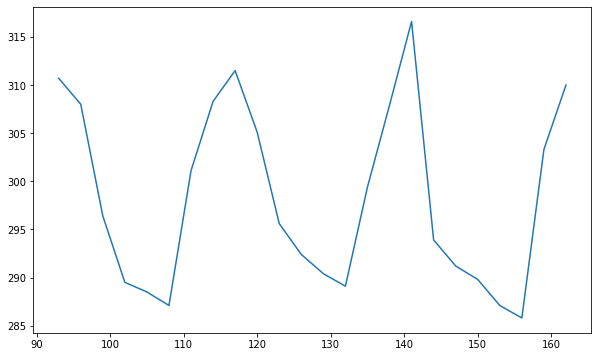

In [38]:
# Create a figure and an axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot times as x-variable and temperatures as y-variable
ax.plot(times, temps)

From there, we can do things like ask the axis to add labels for x and y:

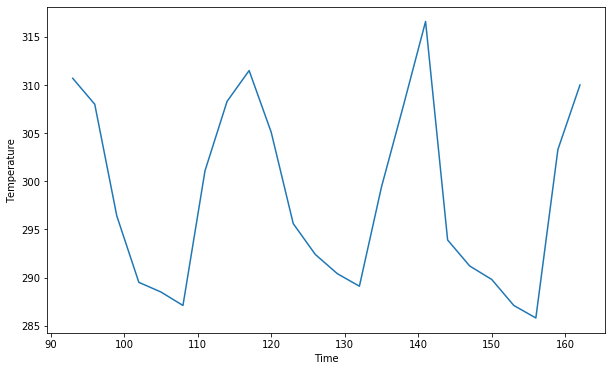

In [39]:
# Add some labels to the plot
ax.set_xlabel('Time')
ax.set_ylabel('Temperature')

# Prompt the notebook to re-display the figure after we modify it
fig

We can also add a title to the plot:

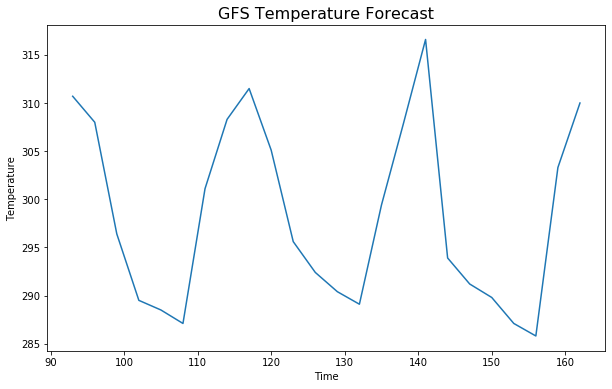

In [40]:
ax.set_title('GFS Temperature Forecast', fontdict={'size':16})

fig

## Plotting Maps with Cartopy

We need to plot lots of maps in meteorology, and the cartopy module is really useful for making them easily and quickly. We're going to import two important parts of cartopy to work with: cartopy's Coordinate Reference System (crs), which is a set of tools for working with map projections, as ccrs; and cartopy's feature tools for adding features to a map, such as states, coastlines, and counties.

In [41]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Let's make our first map, using a PlateCarree projection and not limiting its extent. The ax.coastlines command adds coastline outlines the the map. 

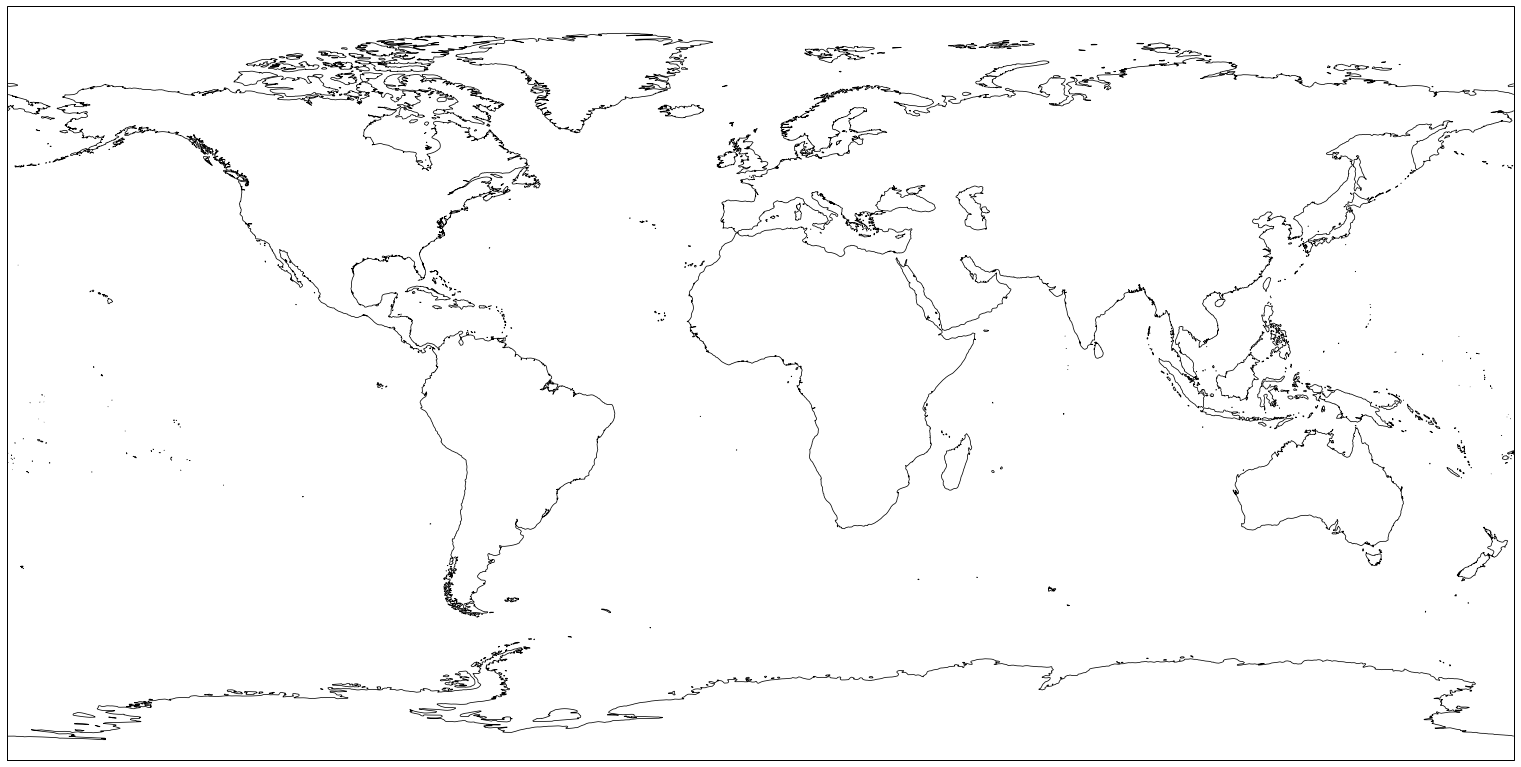

In [42]:
fig=plt.figure(1,figsize=(27.,18.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines('50m',edgecolor='black',linewidth=0.75)

We can also add country, state, and county boundaries. Let's import MetPy's US state and county shapefiles and add them to the map

In [43]:
from metpy.plots import USCOUNTIES
from metpy.plots import USSTATES

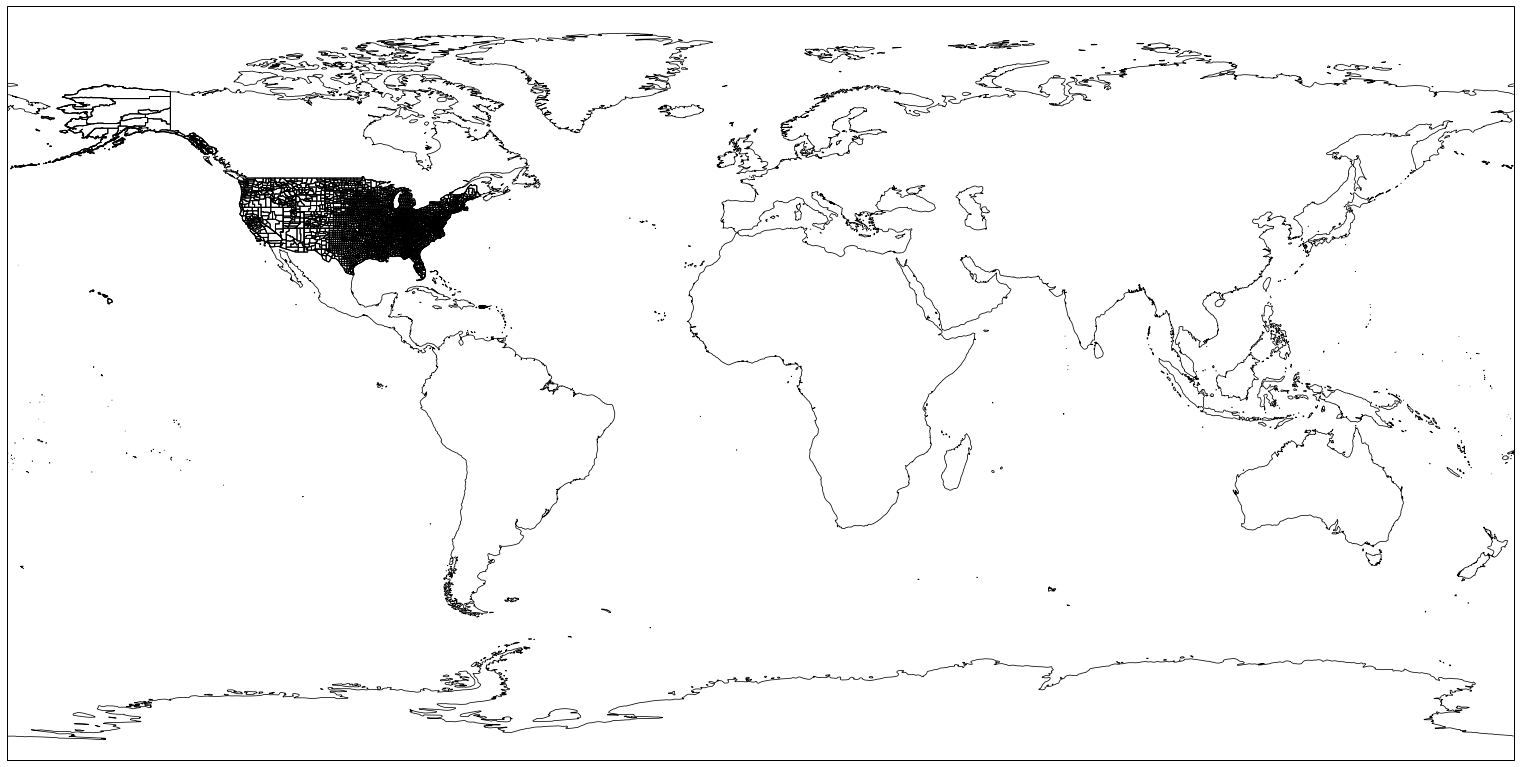

In [44]:
fig=plt.figure(1,figsize=(27.,18.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black')
ax.add_feature(USSTATES.with_scale('20m'), edgecolor='black')

Now, we'll want to limit our map to a smaller area so we can actually see out counties. Here, we're setting the central point of our map using cenlon and cenlat, and specifying our map extent in degrees latitude and longitude by setting where the lower left (LL) corner and upper right (UR) corner of our map will be, relative to out central point. The call to ccrs.PlateCaree() specifies the map projection we'll be using.

In [45]:
cenlat = 39.95
cenlon = -101.71
LL = (cenlon-2.0,cenlat-3.2,ccrs.PlateCarree())
UR = (cenlon+4.5,cenlat+1.8,ccrs.PlateCarree())

Now we can use ax.set_extent to limit our map extent with LL and UR as arguments

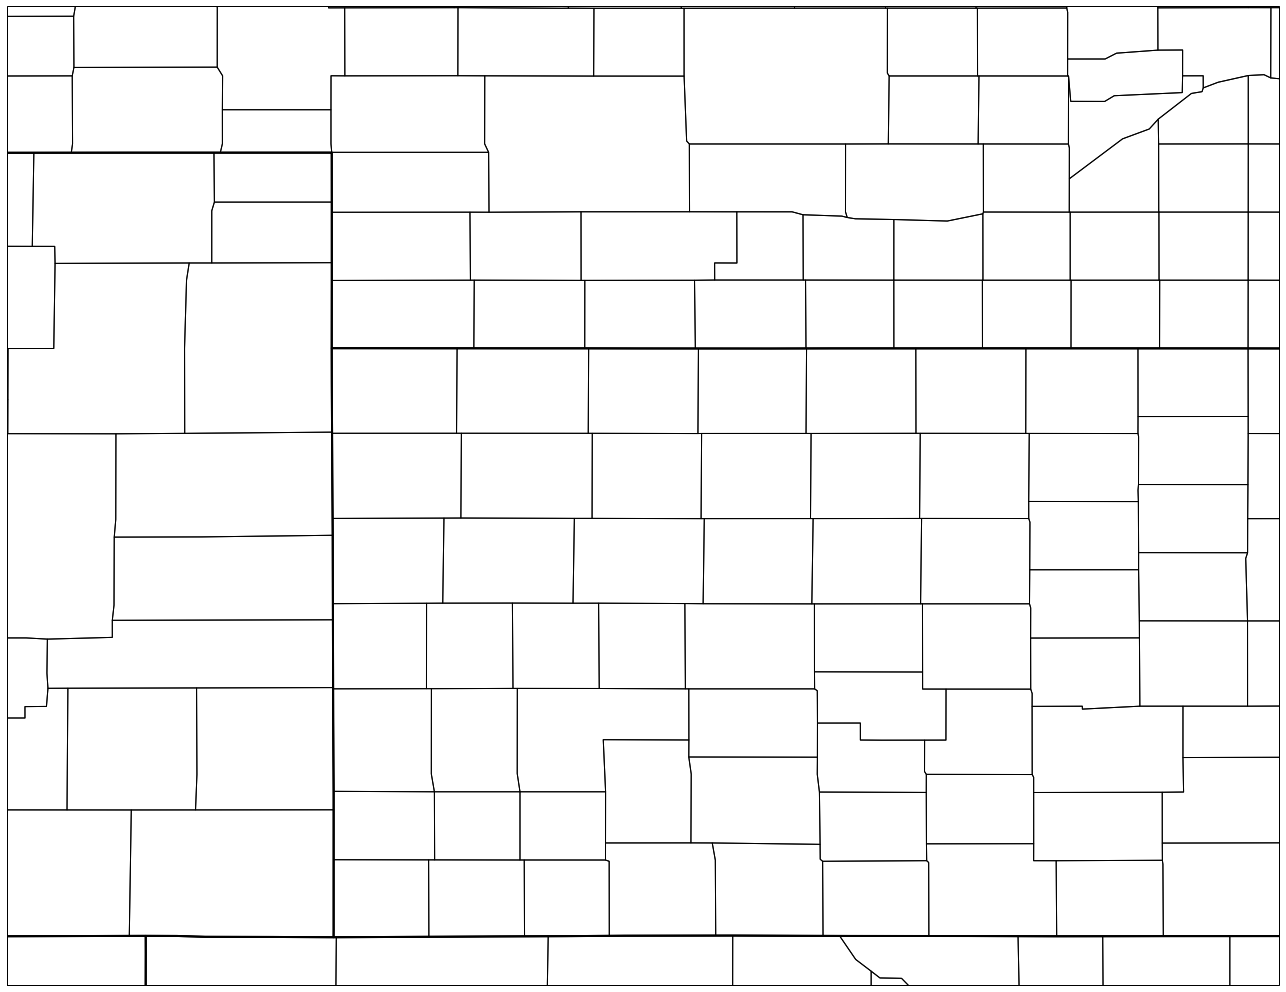

In [46]:
fig=plt.figure(1,figsize=(27.,18.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([LL[0],UR[0],LL[1],UR[1]])
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black')
ax.add_feature(USSTATES.with_scale('20m'), edgecolor='black', linewidths=2)

Now let's plot something on the map. How about tornado reports from 5/17/2019?

In [47]:
#Let's create some arrays of tornado report lats and lons
torlats = np.array([39.72,30.89,40,40.12,40.14,40.26,40.23,40.27,40.35,40.35,40.2,40.27,
                    40.27,40.47,40.56,40.53,40.58,40.64,40.73,40.72,36.98,40.76,36.98,37,
                    40.71,40.72,40.88,40.89,40.86,40.93,41,41.1,40.86,37.41,37.44,37.52,37.54,
                    37.57,37.6,37.52,37.71,37.72,37.76,37.87,38.03,38.26,38.27,31.33,31.34,
                    31.49,32.44,32.47,32.61])
torlons = np.array([-101.28,-102.47,-101.16,-100.82,-100.84,-100.72,-100.72,-100.7,-100.42,
                    -100.62,-100.84,-100.72,-100.69,-100.46,-100.34,-100.38,-100.32,-100.25,
                    -100.19,-100.19,-100.58,-100.09,-100.58,-100.57,-100.2,-100.2,-99.99,
                    -99.98,-99.94,-99.87,-99.77,-99.76,-99.95,-100.23,-100.05,-99.94,-99.91,
                    -99.89,-99.85,-99.94,-99.68,-99.65,-99.54,-99.41,-99.14,-98.79,-98.81,-100.61,
                    -100.62,-100.45,-99.74,-99.78,-99.7])

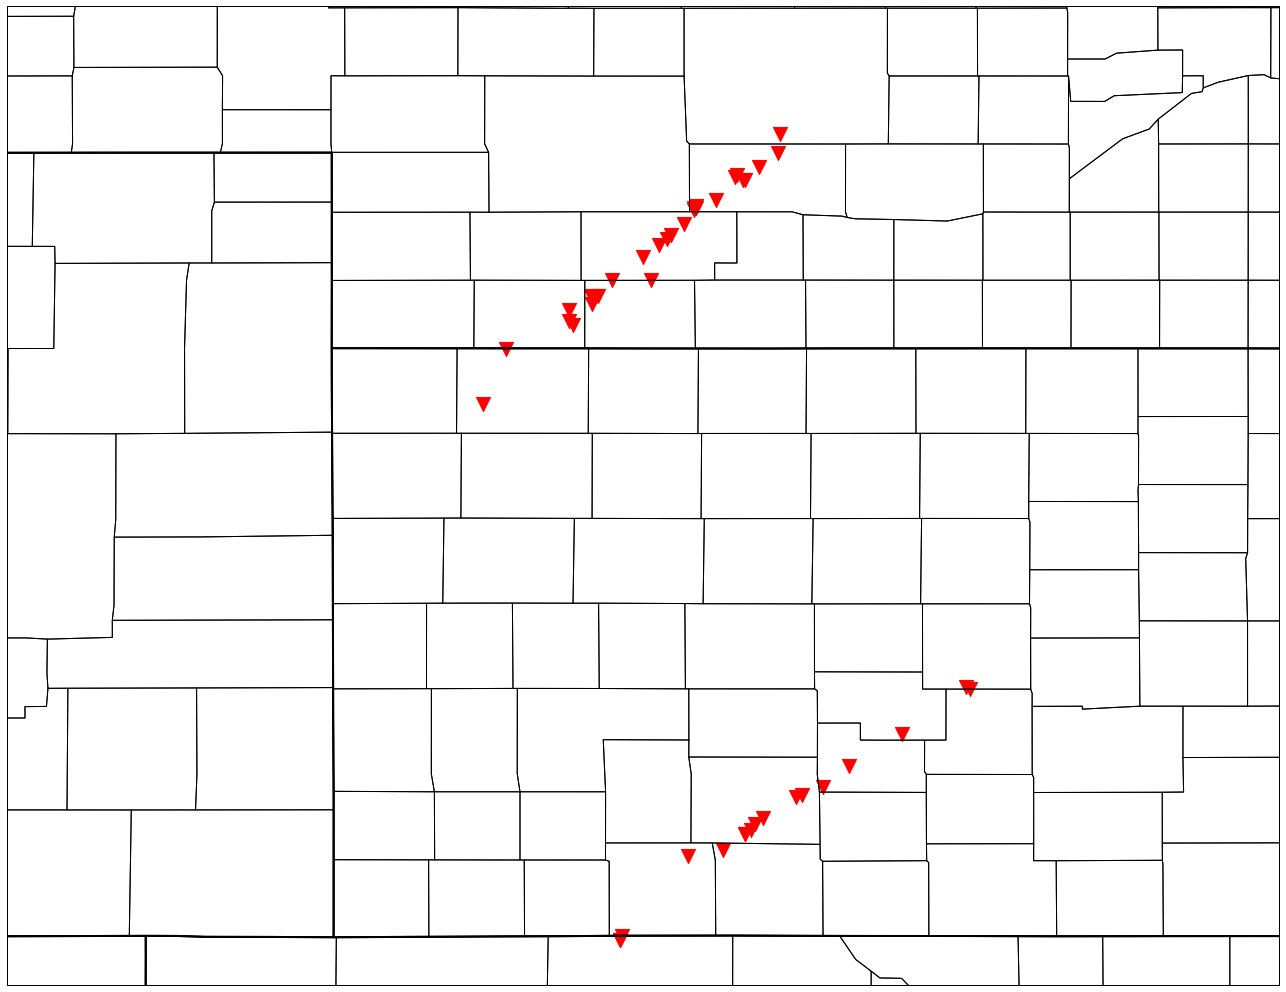

In [48]:
fig=plt.figure(1,figsize=(27.,18.))
ax = plt.subplot(111,projection=ccrs.PlateCarree())
ax.set_extent([LL[0],UR[0],LL[1],UR[1]])
ax.coastlines('50m',edgecolor='black',linewidth=0.75)
ax.add_feature(USCOUNTIES.with_scale('20m'), edgecolor='black')
ax.add_feature(USSTATES.with_scale('20m'), edgecolor='black', linewidths=2)
ax.scatter(torlons, torlats, s=200, marker='v', color='r')

## Resources

The goal of this tutorial is to provide an initial introduction to NumPy, Matplotlib, and Cartopy. For more information, try looking at these resources:
- [Tentative NumPy Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)
- [NumPy User Guide](http://docs.scipy.org/doc/numpy/user/)
- [Introduction to NumPy from SAM](http://www.sam.math.ethz.ch/~raoulb/teaching/PythonTutorial/intro_numpy.html)
- [Matplotlib Documentation](http://matplotlib.org)
- [Matplotlib `plot` documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot)